<a href="https://colab.research.google.com/github/mustapha95000/Sentiment_AI_ML/blob/main/Social_Media_Sentiment_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.9 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Reddit Posts:
                                               title  \
0  How to remove "src." from the start of my impo...   
1                                Beginner help! Mimo   
2  In this Linked List, where am I getting the at...   
3          Matplotlib scatter and imshow interaction   
4  its possible to create this python program: i ...   
5  How to parse BeautifulSoup for front-end website.   
6                     Interactive data visualization   
7      Fixed hash values for classes in Python. Why?   
8   Need some Help with a simple program Im creating   
9  Is it possible to use an API written in C# .NE...   

                                                text  score  \
0  I have a project that follows Python's [recomm...      1   
1  Hi everyone! I am using the mimo app as well a...      1   
2  I have a linked list, that can Insert, search,...      3   
3  I have the following snippet of code:\n\n&#x20...      1   
4  I want to save the qr code that my camera scan...  

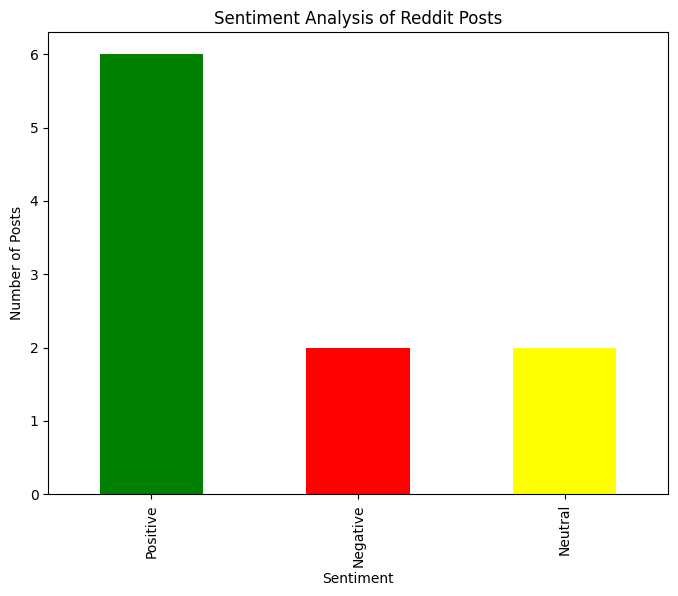

'\nThe Social Media Sentiment Tracker is a Python-based sentiment analysis project \nimplemented in Google collab research workspace, targeting the analysis of posts \non the Reddit platform. The project utilizes the PRAW library for Reddit API \ninteractions, pandas for data manipulation, Matplotlib for visualization, and \nTextBlob for sentiment analysis. After setting up Reddit API credentials, the \nscript fetches a specified number of posts from a chosen subreddit, storing \nthem in a DataFrame. The sentiment of each post is then analyzed using TextBlob, \nand sentiments are classified as positive, negative, or neutral. The final step \ninvolves visualizing the distribution of sentiments through a bar chart. This \nproject serves as a comprehensive guide, demonstrating the entire process from \naccessing social media data to sentiment analysis and visualization, providing a \npractical template for users interested in monitoring and understanding sentiment \ntrends on platforms li

In [1]:
!pip install praw

# Import necessary libraries
import praw
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# Set up Reddit API credentials
# Visit https://www.reddit.com/prefs/apps to create an app and get your credentials
reddit_client_id = '7jNtffwEDSuYGLgr2tGEJQ'
reddit_client_secret = 'mMF4DKp4b9Jm3IUyq6a_TV9JP_5ugw'
reddit_user_agent = 'Alfa_romeo'

# Set up praw Reddit instance
reddit = praw.Reddit(client_id=reddit_client_id,
                     client_secret=reddit_client_secret,
                     user_agent=reddit_user_agent)

# Function to get Reddit posts and their sentiments
def get_reddit_posts(subreddit, num_posts):
    subreddit = reddit.subreddit(subreddit)
    posts = []

    for post in subreddit.new(limit=num_posts):
        posts.append({
            'title': post.title,
            'text': post.selftext,
            'score': post.score,
            'url': post.url
        })

    return posts

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to classify sentiment
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Specify the subreddit and the number of posts to analyze
subreddit_name = 'learnpython'
num_posts_to_analyze = 10

# Get Reddit posts
reddit_posts = get_reddit_posts(subreddit_name, num_posts_to_analyze)

# Create a DataFrame to store the data
df = pd.DataFrame(reddit_posts)

# Analyze sentiments and classify them
df['sentiment_score'] = df['text'].apply(analyze_sentiment)
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Display the DataFrame
print("Reddit Posts:")
print(df)

# Visualize sentiments
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'yellow'])
plt.title('Sentiment Analysis of Reddit Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

"""
The Social Media Sentiment Tracker is a Python-based sentiment analysis project
implemented in Google collab research workspace, targeting the analysis of posts
on the Reddit platform. The project utilizes the PRAW library for Reddit API
interactions, pandas for data manipulation, Matplotlib for visualization, and
TextBlob for sentiment analysis. After setting up Reddit API credentials, the
script fetches a specified number of posts from a chosen subreddit, storing
them in a DataFrame. The sentiment of each post is then analyzed using TextBlob,
and sentiments are classified as positive, negative, or neutral. The final step
involves visualizing the distribution of sentiments through a bar chart. This
project serves as a comprehensive guide, demonstrating the entire process from
accessing social media data to sentiment analysis and visualization, providing a
practical template for users interested in monitoring and understanding sentiment
trends on platforms like Reddit or instagram.
"""